/tmp/ipykernel_9087/1192388636.py:56: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/tmp/ipykernel_9087/1192388636.py:56: FutureWarning:

In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`

/tmp/ipykernel_9087/1192388636.py:41: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/tmp/ipykernel_9087/1192388636.py:41: 

Iteration 0
Cost Function 1.3010803353674512
Iteration 1000
Cost Function 0.5855002596956255
Iteration 2000
Cost Function 0.3279922591211624
Iteration 3000
Cost Function 0.2133988829269482
Iteration 4000
Cost Function 0.1498690773107251
Iteration 5000
Cost Function 0.10885404439853998
Iteration 6000
Cost Function 0.08022444689828356
Iteration 7000
Cost Function 0.05955507658832203
Iteration 8000
Cost Function 0.04443073675442803
Iteration 9000
Cost Function 0.033306310325910034


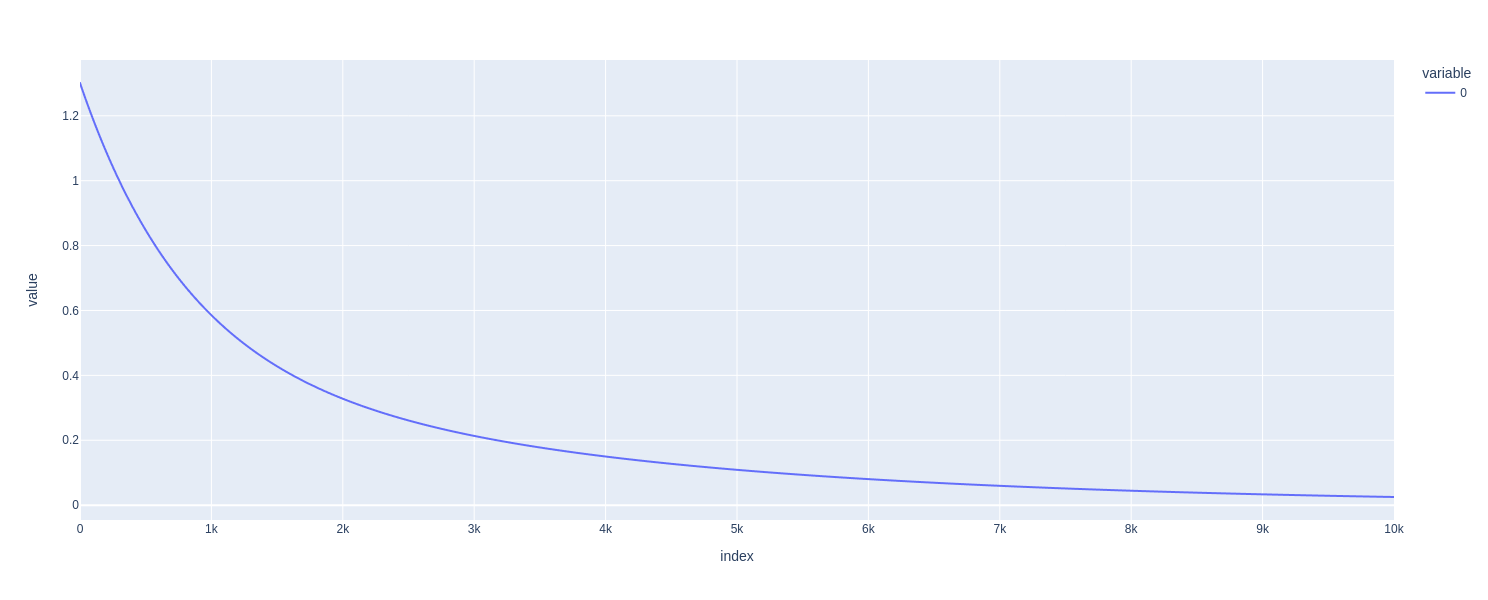

[-0.02800661  0.32484474  0.02575764 ... -0.03954567  0.0107013
 -0.0810621 ] 0      -0.026598
1       0.390704
2      -0.034731
3      -0.055062
4      -0.024565
          ...   
1323   -0.064211
1324   -0.089625
1325   -0.042863
1326   -0.038797
1327   -0.046929
Name: Qiymet, Length: 1328, dtype: float64


In [105]:
import re
import pandas as pd
import plotly.express as px
import numpy as np
from sklearn import linear_model
import matplotlib.pyplot as plt


class Normalization:
        
    def do_min_max_normalization(self, columns: list):
        
        for column in columns:
            m=self.data[column].max()-data[column].min()
            self.data.loc[:,column] = self.data[column].apply(lambda x: (x-self.data[column].min())/m)

    def do_mean_normalization(self, columns: list):
        self.__data = self.get_data_copy()
        for column in columns:
            self.data.loc[:,column] = self.data.loc[:,column].apply(lambda x: (x-self.data[column].mean())/(self.data[column].max()-self.data[column].min()))
        
    def do_z_score_normalization(self, columns: list):
        for column in columns:
            mean = self.data[column].mean()
            standard_deviation = self.data[column].std()
            self.data[column] = self.data[column].apply(
                lambda x: (x-mean)/standard_deviation)


class LinearRegression(Normalization):
    def __init__(self, data_path: str, columns: list) -> None:
        self.__df = pd.read_csv(data_path)
        self.data = self.__df[columns]
        

    def __len__(self):
        return len(self.data)

    def clean_data(self, columns: list):
        for column in columns:
            self.data.loc[:, column] = self.data.loc[:,column].apply(
                self.do_type_conversions)

    def do_type_conversions(self, value):
        if type(value) != str:
            return int(value)
        value = re.split("\s+", value)
        if value[-1].upper() == "KM":
            return int("".join(value[:-1]))
        elif value[-1].upper() == "AZN":
            return float(value[0])
        elif value[-1].upper() == "$":
            return float(value[0])*1.70

    def clean_price_and_convert(self, col):
        self.data.loc[:, col] = self.data.loc[:,col].apply(self.do_type_conversions)

    def get_data_copy(self):
        return self.data.copy()

    def calculate_cost(self, columns: list, Y, W):
        X = [[1]*len(self)] + [self.data[column] for column in columns]
        self.X = np.array(X).T
        self.Y = np.array(self.data[Y])
        self.W = np.array(W)
        pred = self.X.dot(self.W)
        J = np.sum((pred-self.Y)**2)*0.5
        return J/len(self.Y)

    def gradient_descent(self, columns, Y, W, alpha=0.015, iterations=10_000) -> None:
        cost = self.calculate_cost(columns, Y, W)
        self.costH = [cost]
        for i in range(0, iterations):
            if i % 1000 == 0:
                print(f"Iteration {i}")
                print(f"Cost Function {self.costH[-1]}")
            h = self.X.dot(self.W)
            diff = h-self.Y
            g = self.X.T.dot(diff)/len(self)
            self.W = self.W-alpha*g
            self.costH.append(self.calculate_cost(columns, Y, self.W))

    def sklearn_gradient_descent(self, columns, Y):
        reg = linear_model.LinearRegression()
        reg.fit(self.data.iloc[:,:2],self.data.iloc[:,2])
        self.W = reg.coef_
        print(reg.predict(self.data.iloc[:,:2]),self.data.iloc[:,2])

    def visualize_gradient_descent(self):
        fig = px.line(self.costH,width=600,height=600)
        fig.show()

    def visualize_data(self, x, y, z=None):
        if z:
            df = self.data[[x, y, z]]
            fig = px.scatter_3d(df, x=x, y=y, z=z,width=600, height=600)
        else:
            df = self.data[[x, y]]
            fig = px.scatter(df, x=x, y=y,width=500, height=500)

        fig.show()

    def visualize(self):
        pred = self.W[0] + self.W[1]*self.data["Buraxilish ili"]
        plt.scatter(self.data["Buraxilish ili"], self.data["Qiymet"])
        plt.xlabel("Buraxilish ili")
        plt.ylabel("Qiymet")
        plt.plot(self.data["Buraxilish ili"], pred)
        plt.show()

    def predict(self,X,normalize="mean"):
        Y=self.W.T.dot(X)
        return Y
        
        
linear = LinearRegression("./turboaz.csv", columns=["Buraxilish ili", "Yurush", "Qiymet"])
linear.clean_price_and_convert("Qiymet")
linear.clean_data(columns=["Yurush", "Buraxilish ili"])
# linear.visualize_data(x="Yurush", y="Qiymet")
# linear.visualize_data(x="Buraxilish ili", y="Qiymet")
# linear.visualize_data(x="Buraxilish ili", y="Qiymet", z="Yurush")
# linear.do_min_max_normalization(["Yurush", "Qiymet", "Buraxilish ili"])
linear.do_mean_normalization(["Yurush", "Qiymet", "Buraxilish ili"])
# linear.do_z_score_normalization(["Yurush", "Qiymet", "Buraxilish ili"])
linear.gradient_descent(["Buraxilish ili", "Yurush"], "Qiymet", [0, 11, 5])
linear.visualize_gradient_descent()
linear.sklearn_gradient_descent(
    ["Buraxilish ili", "Yurush"], "Qiymet")
# linear.visualize()


In [95]:
linear.W

array([6.65296131e-15, 1.74853602e+00, 1.72122826e+00])

In [49]:
linear.W

array([6.65296131e-15, 1.74853602e+00, 1.72122826e+00])

In [56]:
df = pd.read_csv("turboaz.csv")

In [67]:
df[["Buraxilish ili", "Yurush", "Qiymet"]].iloc[0,:].to_list()

[1999, '366 000 km', '12500 AZN']

In [99]:
linear.predict([1,199,36600])

-3318.144059270082

In [96]:
W

NameError: name 'W' is not defined

In [85]:
linear._Normalization__data

,Buraxilish ili,Yurush,Qiymet
0,1999,366000,12500.0
1,2014,102000,53550.0
2,2002,469700,11700.0
3,1998,556680,9700.0
4,2000,300000,12700.0
...,...,...,...
1323,1996,325000,8800.0
1324,1994,280000,6300.0
1325,1998,272000,10900.0
1326,2000,207000,11300.0
